# ITCS 4152/5152 Assignment2
**Due date: 11:59 pm EST on Mar 1, 2024 (Fri.)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your UNC Charlotte (*.uncc.edu) account for coding and Google Drive to save your results.


## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip
    pip --version
    pip -V
```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'assignment2.ipynb' with your Jupyter Notebook and do your homework there.*


## Example
---
Please read through the following examples where we apply image thresholding to an image. This example is desinged to help you get familiar with the basics of Python and routines of OpenCV. This part is for your exercises only, you do not need to submit anything from this part.

In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Replace '------' with the path such that "Surname_Givenname_UNCCID_assignment2" is your working directory
cd '/content/gdrive/My Drive/------'

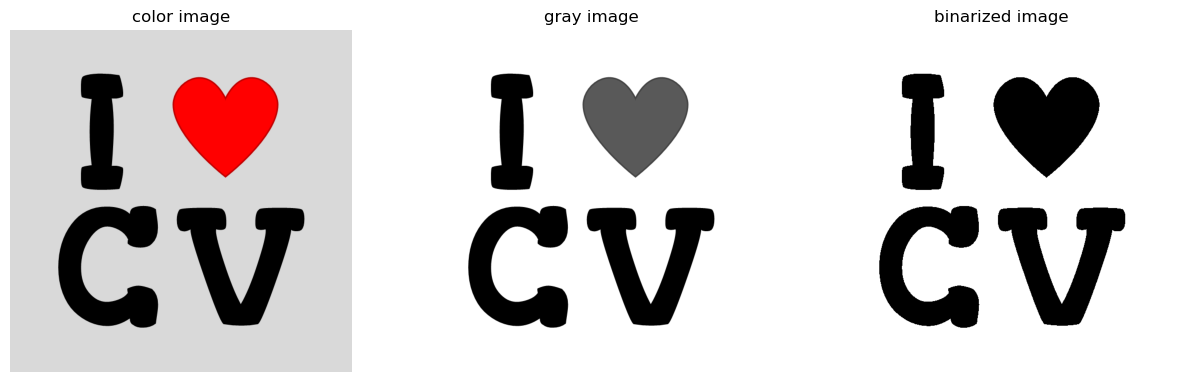

In [2]:
# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/IloveCV.png')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global tresholder
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('color image')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('gray image')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('binarized image')
plt.axis("off")

plt.show()

## Start of Assignment2
---


## Problems
---

## Problem Description
---
In this assignment you will experiment with SIFT features for scene matching. You will work with the SIFT tutorial and code from the University of Toronto. In the compressed homework file, you will find the tutorial document (tutSIFT04.pdf) and a paper from the International Journal of Computer Vision (ijcv04.pdf) describing SIFT. Although the tutorial document assumes matlab implemention, you should still be able to follow the technical details in it. In addition, you are **STRONGLY** encouraged to read this paper unless you’re already quite familiar with matching and recognition using SIFT.

There are 2 problems in this assignment with a total of 100 points. Be sure to read **Submission Guidelines** below. They are important.



## Using SIFT in OpenCV 3.x.x in Local Machine
---
Feature descriptors like SIFT and SURF are no longer included in OpenCV since version 3. This section provides instructions on how to use SIFT for those who use OpenCV 3.x.x. If you are using OpenCV 2.x.x then you are all set, please skip this section. Read this if you are curious about why SIFT is removed https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/.

If you want to use SIFT in your local machine, one simple way to use the OpenCV in-built function `SIFT` is to switch back to version 2.x.x, but if you want to keep using OpenCV 3.x.x, do the following:
1. uninstall your original OpenCV package
2. install opencv-contrib-python using pip (pip is a Python tool for installing packages written in Python), please find detailed instructions at https://pypi.python.org/pypi/opencv-contrib-python

After you have your OpenCV set up, you should be able to use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Using SIFT in OpenCV 3.x.x in Colab (RECOMMENDED)
---
The default version of OpenCV in Colab is 3.4.3. If we use SIFT method directly, typically we will get this error message:

```
error: OpenCV(3.4.3) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'

```

One simple way to use the OpenCV in-built function `SIFT` in Colab is to switch the version to the one from 'contrib'. Below is an example of switching OpenCV version:

1. Run the following command in one section in Colab, which has already been included in this assignment:
```
pip install opencv-contrib-python==3.4.2.16
```
2. Restart runtime by
```
Runtime -> Restart Runtime
```

Then you should be able to use use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Some Resources
---
In addition to the tutorial document, the following resources can definitely help you in this homework:
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
- http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html
- http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html?highlight=sift#cv2.SIFT
- http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [3]:
# pip install the OpenCV version from 'contrib'
!pip install opencv-contrib-python==3.4.18.65

In [4]:
# import packages here
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__) # verify OpenCV version
import os

3.4.18


## Problem 1: Harris Corner Detection
{50 points} Complete the python function to implement the Harris corner detection algorithm. The function should take an input image, apply the necessary preprocessing steps, perform corner detection using the Harris algorithm, and display the original image with the detected corners marked. Implement the Harris corner detection algorithm from scratch using Python and NumPy. Load the input image using any suitable library (e.g., OpenCV, PIL).
- **Step 1**. Perform the following preprocessing steps on the input image:
    - **Step 1.1 (1pt)**. Convert the image to grayscale.
    - **Step 1.2 (1pt)**. Apply Gaussian blur with a suitable kernel size.
- **Step 2**. Implement the Harris corner detection algorithm:
    - **Step 2.1 (12pt)**. Calculate the gradients of the image using Sobel filters.
    - **Step 2.2 (12pt)**. Compute the structure tensor and the Harris response function.
    - **Step 2.3 (12pt)**. Apply non-maximum suppression to find the corner points.
    - **Step 2.4 (12pt)**. Mark the corner points on the original image.

In [5]:
def harris_corner_detection(image, kernel_size, k, threshold):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray,(kernel_size,kernel_size),3)
    
    # Calculate gradients using Sobel filters
    gradient_x = np.abs(cv2.Sobel(blurred, cv2.CV_64F, 1, 0, kernel_size))
    gradient_y = np.abs(cv2.Sobel(blurred, cv2.CV_64F, 0, 1, kernel_size))
    
    # Compute the structure tensor elements
    gradient_xx = gradient_x * gradient_x
    gradient_xy = gradient_x * gradient_y
    gradient_yy = gradient_y * gradient_y
    
    # Apply Gaussian filter to structure tensor elements 
    gradient_xx = cv2.GaussianBlur(gradient_xx, (kernel_size, kernel_size), sigmaX=0)
    gradient_xy = cv2.GaussianBlur(gradient_xy, (kernel_size, kernel_size), sigmaX=0)
    gradient_yy = cv2.GaussianBlur(gradient_yy, (kernel_size, kernel_size), sigmaX=0)
    
    # Compute the Harris response function
    det = gradient_xx * gradient_yy - gradient_xy**2
    trace = gradient_xx + gradient_yy
    harris_response = det - k * (trace**2)
    
    # Apply non-maximum suppression to find corner points
    corner_mask = np.zeros_like(image)
    ##########--WRITE YOUR CODE HERE--##########
    
    # Mark corners in red
    corner_mask[harris_response > k * harris_response.max()] = [0, 0, 255]

    ##########-------END OF CODE-------##########
    
    # Overlay corner points on the original image
    output_image = cv2.addWeighted(image,1,corner_mask,1,0)
    
    return output_image

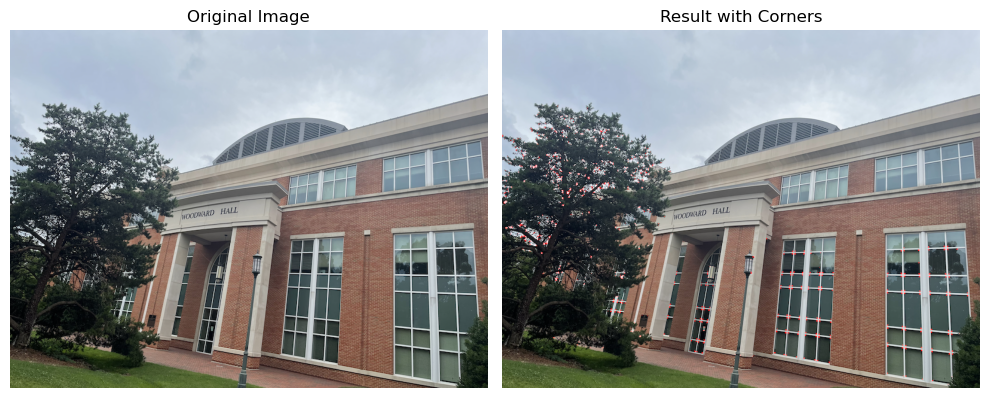

In [6]:
# Read the image
image = cv2.imread("SourceImages/woodward_l.png")

# Set the parameters for Harris corner detection
kernel_size = 3
k = 0.04
threshold = 10000

# Apply Harris corner detection
result = harris_corner_detection(image, kernel_size, k, threshold)

# Display the original image and the resulting image side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
axes[1].set_title('Result with Corners')
axes[1].axis('off')
plt.tight_layout()
plt.show()

## Problem 2: Match transformed images using SIFT features
{50 points} You will transform a given image, and match it back to the original image using SIFT keypoints. 

- **Step 1 (7.5pt)**. Use the function from SIFT class to detect keypoints from the given image. Plot the image with keypoints scale and orientation overlaid.

- **Step 2 (7.5pt)**. Rotate your image clockwise by 45 degrees with the `cv2.warpAffine` function. Extract SIFT keypoints for this rotated image and plot the rotated picture with keypoints scale and orientation overlaid just as in step 1.

- **Step 3 (15pt)**. Match the SIFT keypoints of the original image and the rotated imag using the `knnMatch` function in the `cv2.BFMatcher` class. Discard bad matches using the ratio test proposed by D.Lowe in the SIFT paper. Use **0.1** as the ratio in this assignment. Note that this is for display purpose only. Draw the filtered good keypoint matches on the image and display it. The image you draw should have two images side by side with matching lines across them.

- **Step 4 (10pt)**. Use the RANSAC algorithm to find the affine transformation from the rotated image to the original image. You are **not** required to implement the RANSAC algorithm yourself, instead you could use the `cv2.findHomography` function (set the 3rd parameter `method` to `cv2.RANSAC`) to compute the transformation matrix. Transform the rotated image back using this matrix and the `cv2.warpPerspective` function. Display the recovered image.

- **Step 5 (10pt)**. You might have noticed that the rotated image from step 2 is cropped. Rotate the image without any cropping.

Hints: In case of too many matches in the output image, use the ratio of 0.1 to filter matches.

The image is a duplicate of *Table in front of window* by Pablo Picasso. See https://www.pablopicasso.org/ for more stories about Pablo Picasso and https://www.wikiart.org/en/pablo-picasso/table-in-front-of-window-1919 for more information about this work.


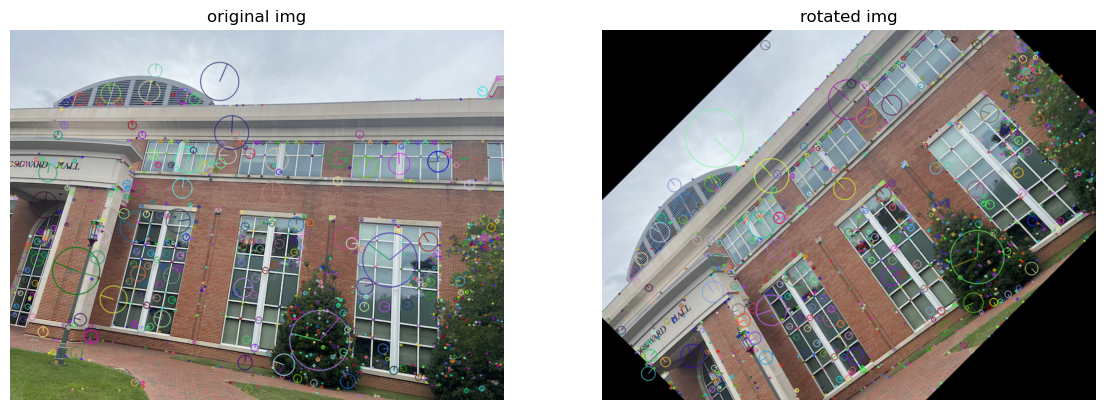

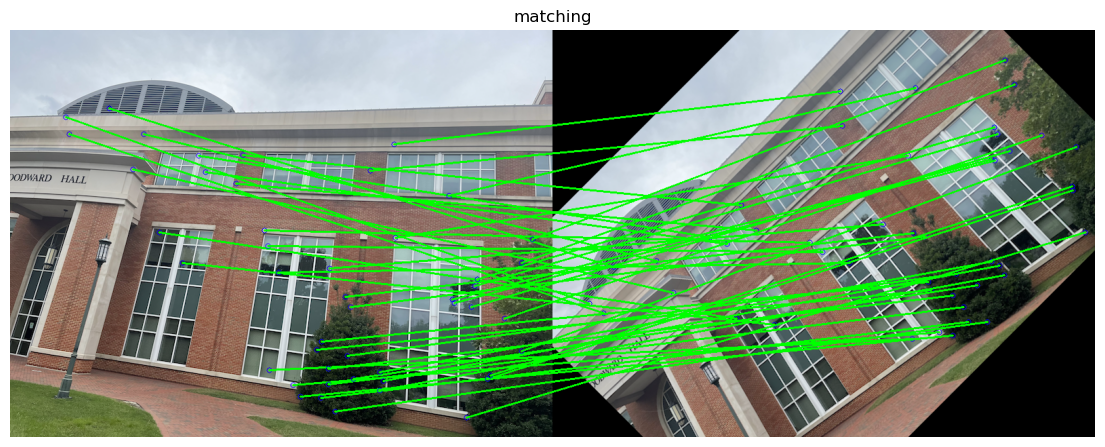

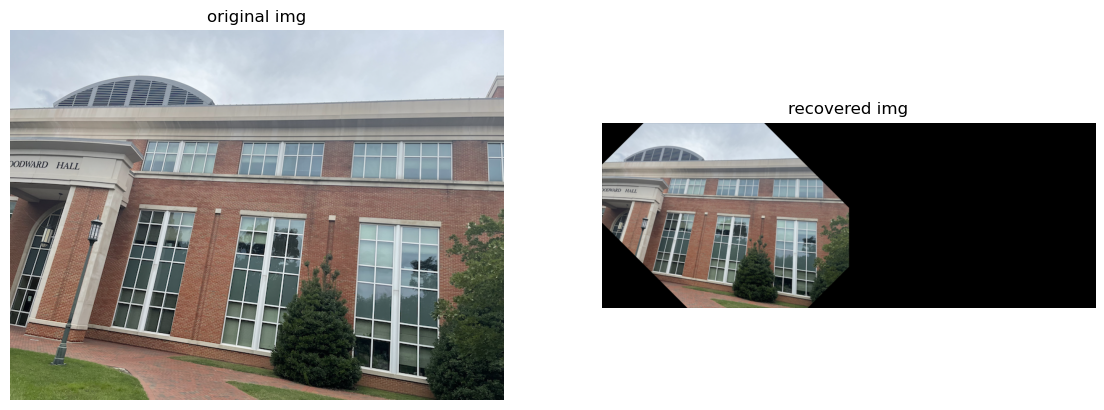

In [14]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale or Color images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    # Create the output image
    # The rows of the output are the largest between the two images
    # and the columns are simply the sum of the two together
    # The intent is to make this a colour image, so make this 3 channels
    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    # stack if the inputs are gray images
    if len(img1.shape) == 2:
      img1 = np.dstack([img1, img1, img1])
    if len(img2.shape) == 2:
      img2 = np.dstack([img2, img2, img2]) 
 
    out[:rows1, :cols1, :] = img1

    # Place the next image to the right of it
    out[:rows2, cols1:, :] = img2

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:
        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0,255,0), 2)
    # Also return the image if you'd like a copy
    return out

# Read image
img_input = cv2.imread('SourceImages/woodward_m.png')

##########--WRITE YOUR CODE HERE--##########
# initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp, des = sift.detectAndCompute(img_input, None)

# Draw keypoints on the image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
res1 = cv2.drawKeypoints(img_input, kp, des, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# rotate image
# use cv2.warpAffine to rotate image
rotation_matrix=cv2.getRotationMatrix2D((img_input.shape[1]/2, img_input.shape[0]/2), 45, 1)
img_input_rot = cv2.warpAffine(img_input, rotation_matrix, (img_input.shape[1], img_input.shape[0]))

# find the keypoints and descriptors on the rotated image
sift_rot = cv2.xfeatures2d.SIFT_create()
kp_rot, des_rot = sift_rot.detectAndCompute(img_input_rot, None)

# Draw keypoints on the rotated image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
res2 = cv2.drawKeypoints(img_input_rot, kp_rot, des_rot, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
##########-------END OF CODE-------##########

# Plot result images
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB));
plt.title('original img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB));
plt.title('rotated img')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# compute feature matching
# use the knnMatch function in the cv2.BFMatcher class
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des_rot, k=2)

# Apply ratio test to keep good matches; ratio=0.1
good_matches=[]

for m, n in matches:
    if m.distance < (0.1 * n.distance):
        good_matches.append(m)


        
# draw matching results with the given drawMatches function
res3 = drawMatches(img_input, kp, img_input_rot, kp_rot, good_matches)
##########-------END OF CODE-------##########

plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB));
plt.title('matching')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# find perspective transform matrix using RANSAC
# use cv2.findHomography

transformation_matrix, _ = cv2.findHomography(
    np.float32([kp_rot[m.trainIdx].pt for m in good_matches]),
    np.float32([kp[m.queryIdx].pt for m in good_matches]),
    cv2.RANSAC
  )

# mapping rotataed image back with the calculated rotation matrix
# use cv2.warpPerspective

height, width = img_input.shape[:2]
rot_height, rot_width = img_input_rot.shape[:2]
res4 = cv2.warpPerspective(img_input_rot, transformation_matrix, (rot_width + width, height))
##########-------END OF CODE-------##########


# plot result images
plt.figure(figsize=(14,8));
plt.subplot(1, 2, 1);
plt.imshow(cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB));
plt.title('original img');
plt.axis('off');

plt.subplot(1, 2, 2);
plt.imshow(cv2.cvtColor(res4, cv2.COLOR_BGR2RGB));
plt.title('recovered img');
plt.axis('off');


## Submission guidelines
---
Please submit a pdf file that includes a ***google shared link***(explained in the next paragraph) through canvas. This pdf file should be named as **Surname_Givenname_UNCCID_assignment*.pdf** (example: Jordan_Michael_800134567_assignment2.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_UNCCID_assignment2*** (example: Jordan_Michael_800134567_assignment2 for this assignment) in your Google Drive with your UNCC account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_UNCCID_assignment2       
        |---SourceImages
        |---Results
        |---[Your_code].ipynb
```
Note that this folder should be in your Google Drive with your UNCC account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter TA's emails: ***mgovind@charlotte.edu*** and ***ndhamele@charlotte.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in canvas. 

Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_UNCCID_assignment2' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Canvas. Please ask questions on Canvas and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have THREE days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
